In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [130]:
dataset.shape

(6704, 6)

In [131]:
dataset[dataset.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [132]:
# removing the all data with null values 
dataset = dataset.dropna().reset_index(drop=True)

In [133]:
dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [134]:
# drop the gender and age dataset 
dataset = dataset.drop(['Age','Gender'],axis=1)

In [94]:
dataset.head()

,Gender_Female,Gender_Male,Gender_Other,Education Level,Job Title,Years of Experience,Salary
0,0.0,1.0,0.0,Bachelor's,Software Engineer,5.0,90000.0
1,1.0,0.0,0.0,Master's,Data Analyst,3.0,65000.0
2,0.0,1.0,0.0,PhD,Senior Manager,15.0,150000.0
3,1.0,0.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,0.0,1.0,0.0,Master's,Director,20.0,200000.0


In [135]:
# also drop the job column 
dataset = dataset.drop(['Job Title'],axis=1)

In [136]:
# let's encode the education level
dataset['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [137]:
# let's first map and encode it 
dataset['Education Level'] = dataset['Education Level'].map({"Bachelor's":"Bachelor",
                                                            "Bachelor's Degree":"Bachelor",
                                                            "High School":"High School",
                                                            "Master's":'Master',
                                                            "Master's Degree":"Master",
                                                            "phD":"phD",
                                                            "PhD":"phD"
                                                            })

In [138]:
dataset['Education Level'].unique()

array(['Bachelor', 'Master', 'phD', 'High School'], dtype=object)

In [139]:
# encode it 
dataset['Education Level'] = dataset['Education Level'].map({
    'High School':0,
    'Bachelor':1,
    'Master':2,
    'phD':3
})

In [140]:
dataset.head()

,Education Level,Years of Experience,Salary
0,1,5.0,90000.0
1,2,3.0,65000.0
2,3,15.0,150000.0
3,1,7.0,60000.0
4,2,20.0,200000.0


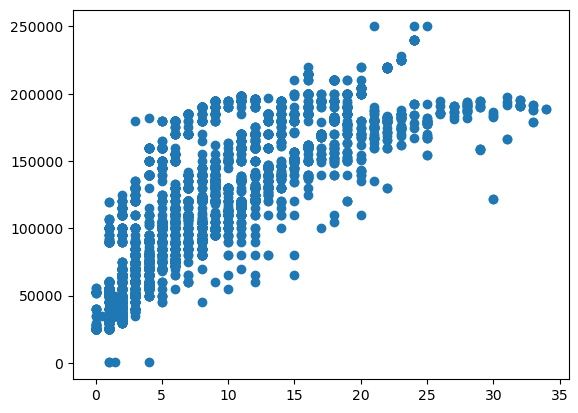

In [154]:
# what is the relation between the years of experience and salary
plt.scatter(x=dataset['Years of Experience'],y=dataset['Salary'])

In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698 entries, 0 to 6697
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education Level      6698 non-null   int64  
 1   Years of Experience  6698 non-null   float64
 2   Salary               6698 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 157.1 KB


In [143]:
dataset.head()

,Education Level,Years of Experience,Salary
0,1,5.0,90000.0
1,2,3.0,65000.0
2,3,15.0,150000.0
3,1,7.0,60000.0
4,2,20.0,200000.0


In [144]:
# dependent features and independent feature
x = dataset.drop(['Salary'],axis=1)
y = dataset['Salary']

In [175]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

<Axes: >

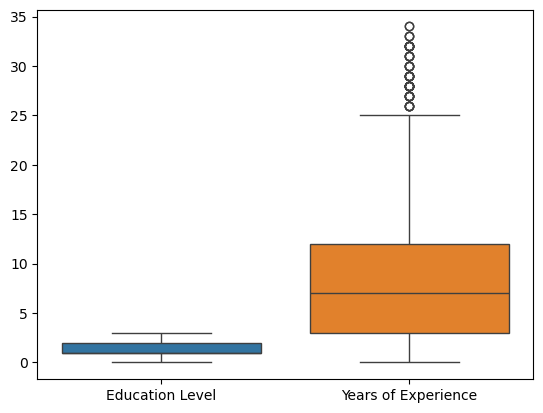

In [176]:
# before scaling the data
sns.boxplot(x_train)

<Axes: >

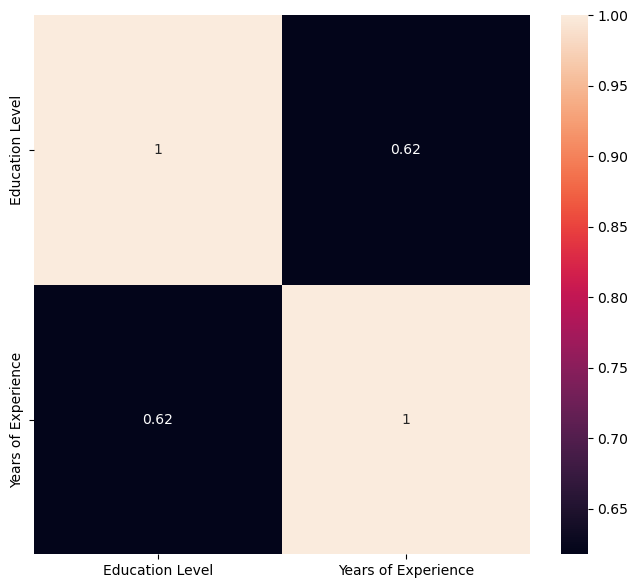

In [147]:
# Feature selection
plt.figure(figsize=(8,7))
sns.heatmap(x_train.corr(),annot=True)

In [177]:
# scaled the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled =scalar.transform(x_test)

## Regression Model

In [178]:
# Multi-Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled,y_train)
y_pred = linear_reg.predict(x_test_scaled)
r_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score:{r_score}")
print(f"Mean absolute Error:{mae}")

# Our model is performing well 
# Here error looks too high but actually this is the difference between predicted salary and a actually salary by 23k,
# The difference of 23k amount is still a high error

R2 score:0.679582105626305
Mean absolute Error:23399.75184517016


<Axes: xlabel='Salary', ylabel='Count'>

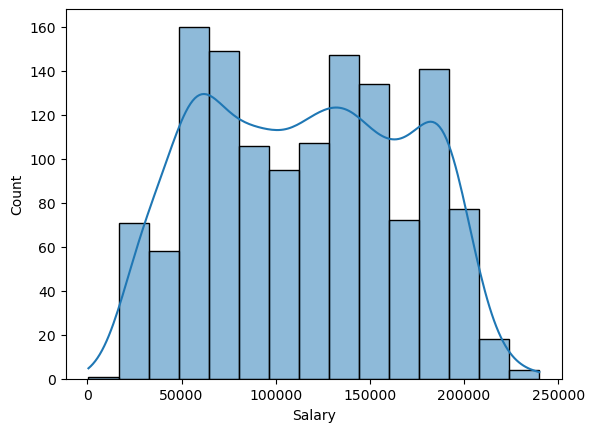

In [179]:
sns.histplot(y_test,kde=True)

<Axes: ylabel='Count'>

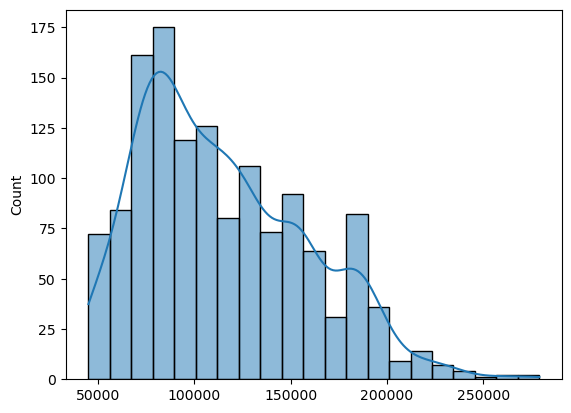

In [180]:
sns.histplot(y_pred,kde=True)

## Lasso regression

In [181]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lass_reg = Lasso(alpha=0.1)
lass_reg.fit(x_train_scaled,y_train)
y_pred = lass_reg.predict(x_test_scaled)
r_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score:{r_score}")
print(f"Mean absolute Error:{mae}")

R2 score:0.6795821701081937
Mean absolute Error:23399.750972260863


In [182]:
lass_reg.coef_

array([12668.02920393, 35051.50566353])

## Ridge regression

In [183]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(x_train_scaled,y_train)
y_pred = ridge_reg.predict(x_test_scaled)
r_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score:{r_score}")
print(f"Mean absolute Error:{mae}")

R2 score:0.6795837192051495
Mean absolute Error:23400.447176075886


## Lasso Cross Validation

In [184]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error
lasscv_reg = LassoCV(cv=5)
lasscv_reg.fit(x_train_scaled,y_train)
y_pred = lasscv_reg.predict(x_test_scaled)
r_score = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score:{r_score}")
print(f"Mean absolute Error:{mae}")

R2 score:0.6795728180448897
Mean absolute Error:23409.896313463618
